<a href="https://colab.research.google.com/github/Youruler1/ColabTesting/blob/main/IrisNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import torch
import torch.nn as nn
import torch.nn.functional as f

In [152]:
# creating class for nn model
class Model(nn.Module):
  def __init__(self, input_features=4, h1=8, h2=9, output_features=3):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    return self.out(x)

In [153]:
torch.manual_seed(41) # manual seed for inherent randomness
model = Model()

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [156]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [157]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [158]:
# df['species'].replace('setosa',0.0)
# df['species'].replace('versicolor', 1.0)
# df['species'].replace('virginica', 2.0)
df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

<ipython-input-158-e99a02023652>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


In [159]:
# separating the training features and target features
X = df.drop('species', axis=1)
Y = df['species']

# converting to numpy arrays
X = X.values
Y = Y.values

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=41, test_size=0.2)

In [162]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [163]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [164]:
# Training the model
epochs = 100
losses = []

for i in range(epochs):
  Y_pred = model.forward(X_train)
  loss = criterion(Y_pred, Y_train)
  losses.append(loss.detach().numpy())
  if i%10 == 0 :
    print(f"Epoch: {i} and Loss: {loss}")
  optimizer.zero_grad
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.1251550912857056
Epoch: 10 and Loss: 1.025360107421875
Epoch: 20 and Loss: 0.8868398666381836
Epoch: 30 and Loss: 0.672429084777832
Epoch: 40 and Loss: 0.6333284378051758
Epoch: 50 and Loss: 0.4381546378135681
Epoch: 60 and Loss: 1.1988718509674072
Epoch: 70 and Loss: 0.7003136873245239
Epoch: 80 and Loss: 1.377094030380249
Epoch: 90 and Loss: 1.8341525793075562


Text(0.5, 0, 'epochs')

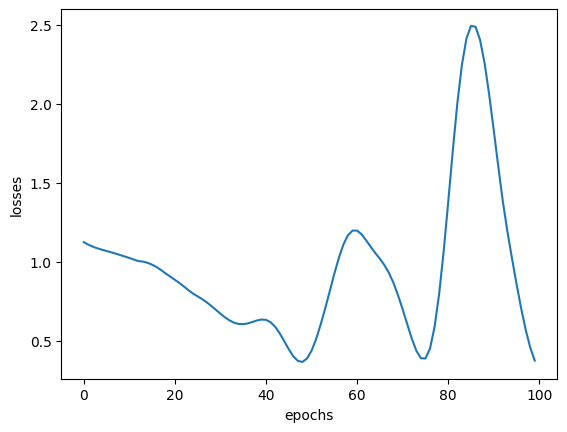

In [165]:
plt.plot(range(epochs), losses)
plt.ylabel('losses')
plt.xlabel('epochs')

In [166]:
# evaluating the model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, Y_test)

loss

tensor(0.3613)

In [167]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_eval = model.forward(data)
    print(f"{i}.)\t{str(y_eval)}\t{Y_test[i]}")
    if y_eval.argmax().item() == Y_test[i]:
      correct += 1

print(f"We got {correct} correct !")

0.)	tensor([-4.1952,  2.4991,  3.2471])	2
1.)	tensor([-5.7274,  3.0598,  4.4963])	2
2.)	tensor([-6.6581,  3.4003,  5.2551])	2
3.)	tensor([-3.0098,  2.0654,  2.2806])	1
4.)	tensor([-5.4881,  2.9722,  4.3012])	2
5.)	tensor([-2.1728,  1.7591,  1.5981])	1
6.)	tensor([-4.3268,  2.5473,  3.3543])	2
7.)	tensor([-3.0054,  2.0638,  2.2770])	1
8.)	tensor([-4.9074,  2.7597,  3.8277])	2
9.)	tensor([-6.2528,  3.2520,  4.9247])	2
10.)	tensor([-4.1384,  2.4783,  3.2007])	2
11.)	tensor([ 6.0668,  1.8391, -4.6956])	0
12.)	tensor([ 5.5724,  1.7048, -4.3470])	0
13.)	tensor([-0.9872,  1.3253,  0.6315])	1
14.)	tensor([ 4.7287,  1.4773, -3.7487])	0
15.)	tensor([-3.9673,  2.4157,  3.0612])	2
16.)	tensor([ 5.2768,  1.6245, -4.1386])	0
17.)	tensor([-4.2051,  2.5027,  3.2551])	1
18.)	tensor([ 5.8362,  1.7764, -4.5330])	0
19.)	tensor([ 4.6891,  1.4648, -3.7241])	0
20.)	tensor([-1.4562,  1.4969,  1.0138])	1
21.)	tensor([-5.9979,  3.1587,  4.7169])	2
22.)	tensor([ 4.8920,  1.5199, -3.8672])	0
23.)	tensor([ 6.0193,

In [168]:
# Testing a new (foreign) data point
newer_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(newer_iris))

tensor([ 6.0193,  1.8262, -4.6621])


In [170]:
# Save our NN Model
torch.save(model.state_dict(), 'saved_NN_model_iris')

In [171]:
# Load our NN Model
my_model = Model()
my_model.load_state_dict(torch.load('saved_NN_model_iris'))

<All keys matched successfully>

In [172]:
# Make sure it loaded correctly
my_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)